In [1]:
# Load the config first before the other modules start complaining.
from ile_utils.config import Config
config = Config.get_config('../direct_opt/configs/config_directSH_init_ptrb.ini') # Temporary; Should load a 'blank' config or a specific one with the 'dataset' section

In [2]:
# Make adjustments to the config:

# Set the downsampling to none:
config.set('dataset','downsample_ratio', value="1")

Config.log_config()

Configuration loaded from file ../direct_opt/configs/config_directSH_init_ptrb.ini was:
[experiment]
project_name = direct-opt-global-INIT_FAIL_PERTUBATIONS_fine-search
run_name_prefix = failed-init_creepy-incantation-7
num_runs = 5
record_frequency = 2

[dataset]
scene = chair_intrinsic
type = intrinsic-global
split = train
dataset_path = /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic
subset_fraction = 10
downsample_ratio = 1
scene_path = %(dataset_path)s/%(scene)s
data_path = %(scene_path)s/%(split)s
transforms_file = %(scene_path)s/transforms_%(split)s.json
lights_file = %(scene_path)s/lights_%(scene)s.json

[parameters]
depth_scale = 0.125
depth_trunc = 8.0

[training]
shuffle_train = True
epochs = 3
learning_rate = 0.001

[global_spherical_harmonics]
sh_initialization = direct_opt/initializations/fail_creepy-incantation-7.npz
sh_initialization_purtubation = direct_opt/initializations/pertubtaion_c0pos_signs.npz
sh_initialization_purtubation_strength_min = 0
sh_initial

In [20]:
# Import the rest of the depts
import spherical_harmonics.visualize as sh_vis
from data_loaders.datasets import IntrinsicGlobalDataset, IntrinsicDiffuseDataset

import numpy as np
from matplotlib import pyplot as plt
import wandb
from PIL import Image

In [18]:
# Image wrangling functions:

def get_half(image_array, top):
    h = image_array.shape[0]
    
    mid_h = h // 2
    if top:
        return image_array[:mid_h, :, :]
    else:
        return image_array[mid_h+1:, :, :]
    
def get_top(image_array):
    return get_half(image_array, top=True)

def get_bot(image_array):
    return get_half(image_array, top=False)


In [4]:
# Make and load the desired dataset
dataset = IntrinsicGlobalDataset(config, split='test')

[datasets.py:143 -             __init__() ] Transform file lists 200 frames to load.
[datasets.py:160 -             __init__() ] Loading dataset from /home/dtetruash/Thesis/datasets/nerf-blender/nerf_synthetic/chair_intrinsic/test
chair_intrinsic/test/r_199: 100%|███████████████| 200/200 [00:21<00:00,  9.19it/s]


In [5]:
# Check the dataset dimensions
dataset.dim

(800, 800)

In [6]:
# Set the Sh coeffs to be used for the visualization:
# Pulled from "direct-opt-global-sh_non-neg-const"/Runs/daily-wood-2
sh_coeffs = np.array([
    0.0923,
    -0.08552,
    0.138,
    -0.05505,
    -0.01142,
    0.0166,
    0.1217,
    -0.08991,
    -0.06109
])


In [7]:
# Get the frames to visualize
frame_nums  = [
    int(i.strip())
    for i in config.get("visualization", "indexes", fallback="39,89").split(",")
]

frame_nums

[39, 89]

In [28]:
sh_render_shading = sh_vis.visualize_scene_frame_from_sh(frame_nums[0], sh_coeffs, dataset, torch_mode=False)[0]
sh_render_shading.shape, sh_render_shading.dtype, sh_render_shading.min(), sh_render_shading.max()

((1600, 800, 4), dtype('float64'), 0.0, 1.0)

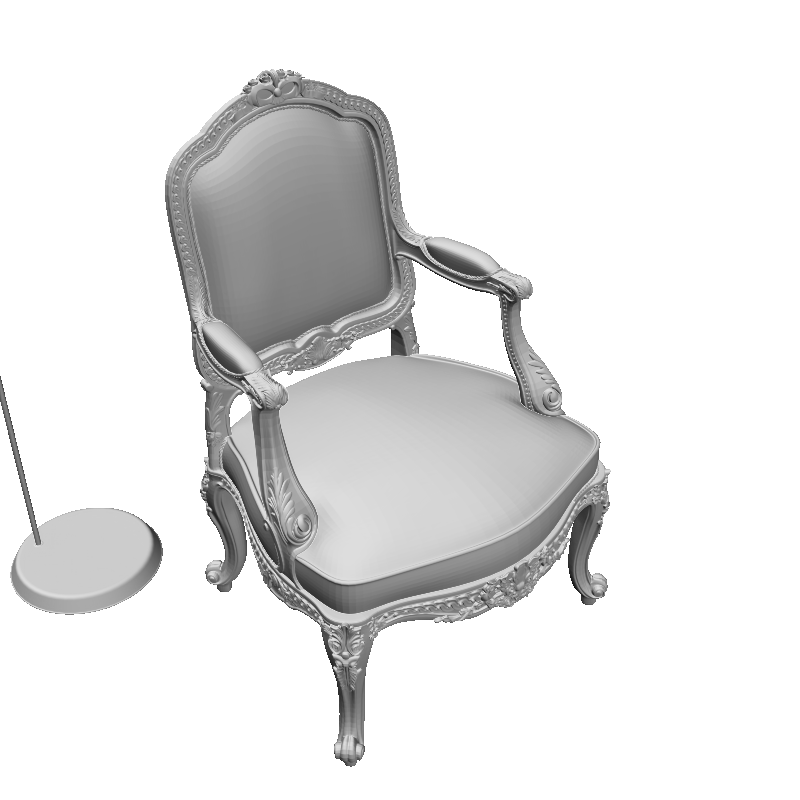

In [34]:
Image.fromarray((get_top(sh_render_shading) * 255).astype('uint8'), 'RGBA')

In [11]:
run = wandb.init(project='"direct-opt-global-sh_non-neg-const"', name='daily-wood-2', mode="offline")
sh_coeffs_table = run.summary["Post-training SH Coefficinets"]
sh_coeffs_table

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 run = wandb.init(project='"direct-opt-global-sh_non-neg-const"', name='daily-wood-2', mo     │
│ ❱ 2 sh_coeffs_table = run.summary["Post-training SH Coefficinets"]                               │
│   3 sh_coeffs_table                                                                              │
│   4                                                                                              │
│                                                                                                  │
│ /home/dtetruash/.miniconda3/envs/thesis/lib/python3.10/site-packages/wandb/sdk/wandb_summary.py: │
│ 35 in __getitem__                                                                                │
│                                                                                                  │
│    32 │   │   return self._as_dict().get(key, default)                                           │
│    33 │                                                                                          │
│    34 │   def __getitem__(self, key):                                                            │
│ ❱  35 │   │   item = self._as_dict()[key]                                                        │
│    36 │   │                                                                                      │
│    37 │   │   if isinstance(item, dict):                                                         │
│    38 │   │   │   # this nested dict needs to be wrapped:                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Post-training SH Coefficinets'